#Boston Housing Data: Ridge and Lasso Linear Regression

In [ ]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Colab Notebooks/Week 2/
!pwd
!ls
print('Working Directory')
print(os.getcwd())

/content/gdrive/My Drive/Colab Notebooks/Week 2
/content/gdrive/My Drive/Colab Notebooks/Week 2
boston.csv		    Hilderbrand_Assignment_2
Boston_Housing_Study-1.pdf  jump-start-boston-housing-v001.py
Working Directory
/content/gdrive/My Drive/Colab Notebooks/Week 2


In [ ]:
# Load data
work_dir = " /content/gdrive/My Drive/Colab Notebooks/Week 2/"
boston_input = pd.read_csv('boston.csv')

## Data Dictionary

NEIGHBORHOOD: Name of the Boston neighborhood (location of the census tract)

CRIM: Crime rate

ZN: Percent of land zoned for lots

INDUS: Percent of business that is industrial or nonretail

CHAS: On the Charles River (1) or not (0)

NOX: Air pollution (nitrogren oxide concentration)

RM: Average number of rooms per home

AGE: percentage of homes built before 1940

DIS: Weighted distance to employment centers

RAD: Accessibility to radial highways

TAX: Tax rate

PTRATIO: Pupil/teacher ratio in public schools

LSTAT: Percentage of population of lower socio-economic status

MV: Median value of homes in thousands of 1970 dollars

In [ ]:
# print the first five rows
boston_input.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
# print the last five rows
boston_input.tail()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
501,Winthrop,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,Winthrop,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,Winthrop,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,Winthrop,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,Winthrop,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,19.0


In [ ]:
# look at data types
boston_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


In [ ]:
# drop the neighborhood column from the data frame
boston_input = boston_input.drop('neighborhood', 1)

In [ ]:
# check data frame info to ensure neighborhood column was dropped
boston_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
boston_input.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# check for null values
boston_input.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

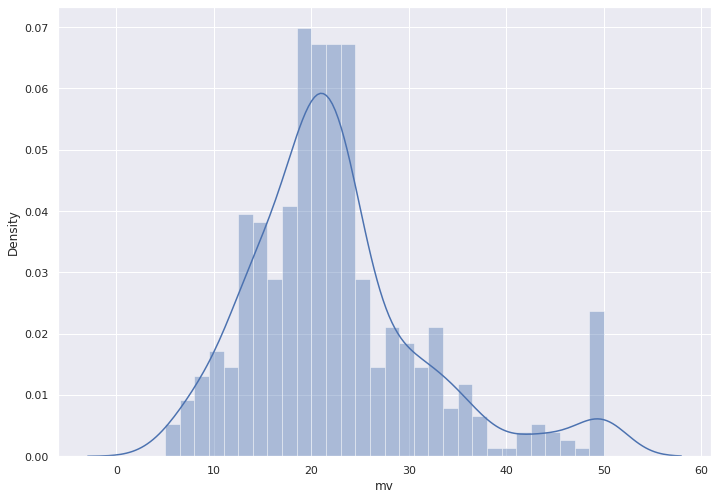

In [ ]:
# distribution of target variable mv
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_input['mv'], bins=30)
plt.show()

The values of mv are distributed normally with a few outliers.

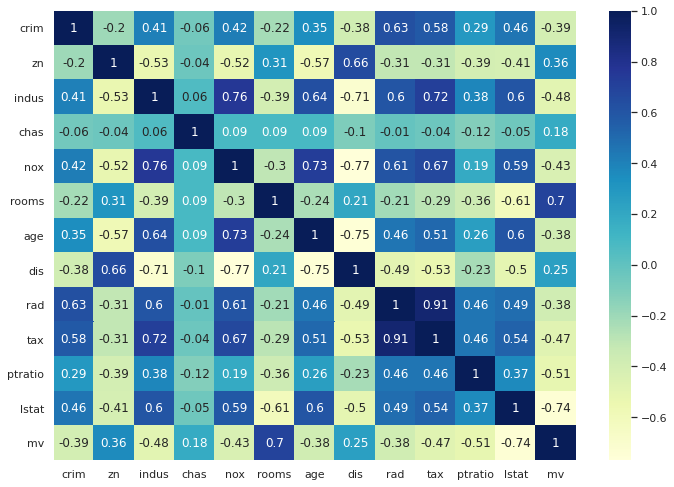

In [ ]:
# create a correlation heat map
correlation_matrix = boston_input.corr().round(2)
sns.heatmap(data=correlation_matrix, cmap="YlGnBu" , annot=True)

Select features that have a strong correlation to target variable (mv). By looking at the correlation matrix it looks like lstat has a high negative correlation with mv (-0.74) and rooms has a high positive correlation with mv (0.7).

The features rad and tax have a correlation (0.91) meaning they are strongly correlated with each other. dis and age are also strongly correlated (-0.75). Only one feature of each of these groupings should be chosen to train the model. I chose to use rooms and lstat based on the observations of the data seen in the correlation matrix.

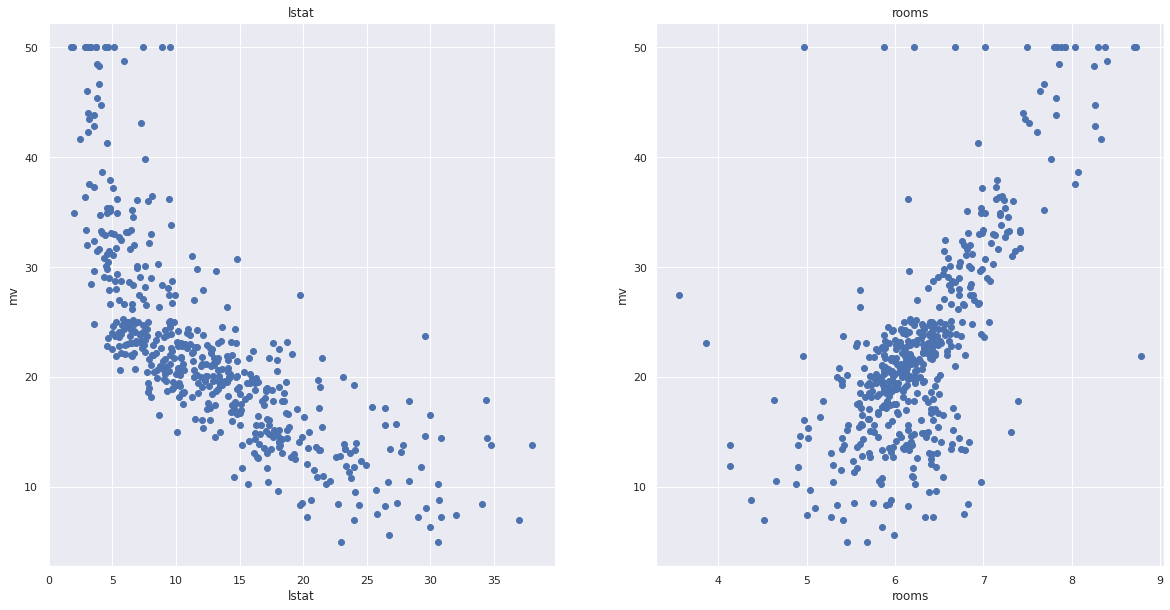

In [ ]:
plt.figure(figsize=(20, 10))

features = ['lstat', 'rooms']
target = boston_input['mv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_input[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mv')

The prices increase as the value of rooms increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in lstat. Though it doesn't look to be following excatly a linear line.

## Prepare Data for the Training Model


In [ ]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(boston_input))

In [ ]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

In [ ]:
# the model data will be standardized form of preliminary model data
boston_model = scaler.fit_transform(boston_input)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', boston_model.shape)

In [ ]:
#X = pd.DataFrame(np.c_[boston_input['lstat'], boston_input['rooms']], columns = ['lstat','rooms'])
#y = boston_input['mv']

X = boston_input.iloc[:, 0:12].values
y = boston_input.iloc[:, 12].values.reshape(-1,1)

In [ ]:
#import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# model evaluation for training set
y_pred_train = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
r2 = r2_score(y_train, y_pred_train)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_pred_test = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:
RMSE is 4.771796445799699
R2 score is 0.7335344548376102


The model performance for testing set:
RMSE is 4.484014283966193
R2 score is 0.7444522016969798


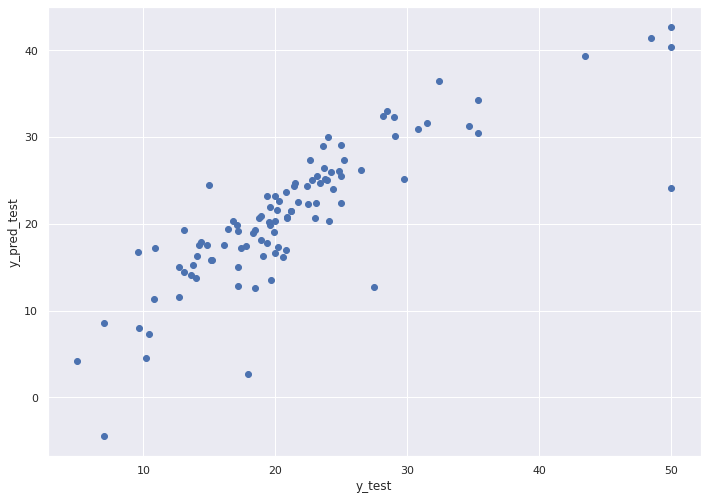

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
#ridge_pred = ridge.predict(X_test)
#ridge.score(X_test, y_test)

# model evaluation for training set
y_pred_ridge_train = ridge.predict(X_train)
rmse_ridge_train = (np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse_ridge_train))
print('R2 score is {}'.format(r2_ridge_train))
print("\n")

# model evaluation for testing set
y_pred_ridge_test = ridge.predict(X_test)
rmse_ridge_test = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse_ridge_test))
print('R2 score is {}'.format(r2_ridge_test))


The model performance for training set:
RMSE is 4.771027278193989
R2 score is 0.7365502720146496


The model performance for testing set:
RMSE is 4.888138680194009
R2 score is 0.6759897044492842


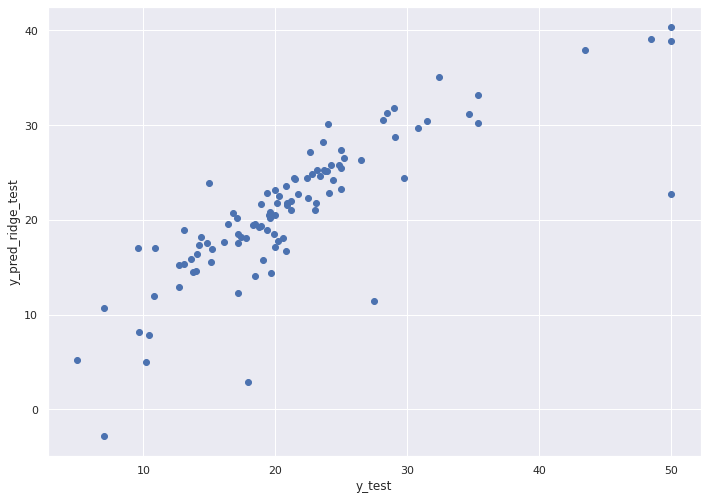

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_pred_ridge_test)
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge_test')
plt.show()

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
#lasso_pred = lasso.predict(X_test)
#lasso.score(X_test, y_test)

# model evaluation for training set
y_pred_lasso_train = lasso.predict(X_train)
rmse_lasso_train = (np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse_lasso_train))
print('R2 score is {}'.format(r2_lasso_train))
print("\n")

# model evaluation for testing set
y_pred_lasso_test = lasso.predict(X_test)
rmse_lasso_test = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse_lasso_test))
print('R2 score is {}'.format(r2_lasso_test))


The model performance for training set:
RMSE is 5.850837914006284
R2 score is 0.5993977569851581


The model performance for testing set:
RMSE is 5.302344708846514
R2 score is 0.6426662105487799


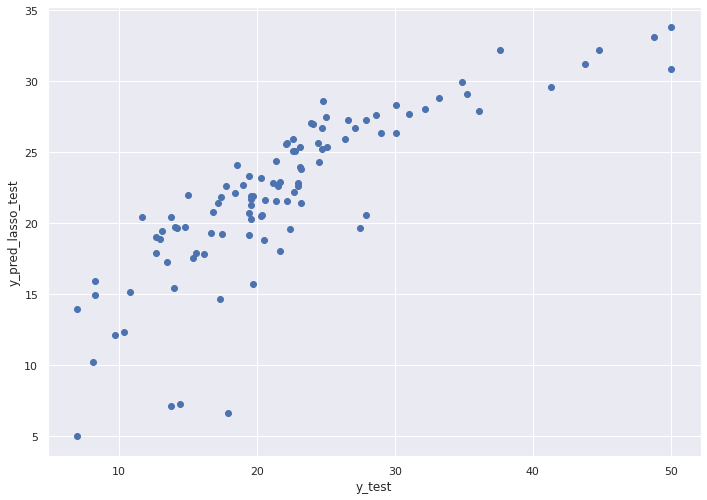

In [ ]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, y_pred_lasso_test)
plt.xlabel('y_test')
plt.ylabel('y_pred_lasso_test')
plt.show()

## Cross Validation

In [ ]:
# specify the k-fold cross-validation design for MV
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))